In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

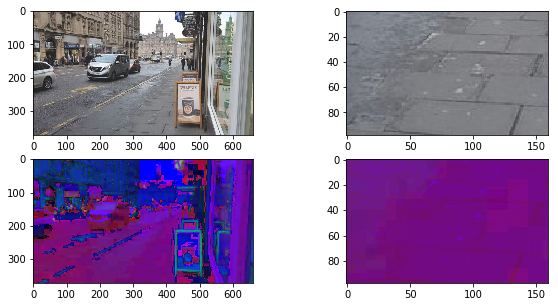

In [2]:
search = cv2.imread('./imgs/search.jpg')
target = cv2.imread('./imgs/target_1.jpg')

f, ax = plt.subplots(2, 2, figsize = (10, 5))
ax[0, 0].imshow(search[:, :, ::-1])
ax[0, 1].imshow(target[:, :, ::-1])
# histogram backprojection is a color-based method
# it answers the question: what colors possibly belong to the foreground?
# we work in the HSV space because HSV color space shows more color correlation
search = cv2.cvtColor(search, cv2.COLOR_BGR2HSV)
target = cv2.cvtColor(target, cv2.COLOR_BGR2HSV)
ax[1, 0].imshow(search)
ax[1, 1].imshow(target)

We will explore two types of histogram backprojection: 2-channel and 1-channel.

c:\users\zheng\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


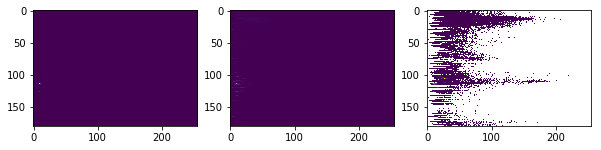

In [3]:
# 2-channel
# explore images' HS co-occurence
M = cv2.calcHist([target], [0, 1], None, [180, 256], [0, 180, 0, 256])
I = cv2.calcHist([search], [0, 1], None, [180, 256], [0, 180, 0, 256])
R = M / I
f, ax = plt.subplots(1, 3, figsize = (10, 5))
ax[0].imshow(M)
ax[1].imshow(I)
ax[2].imshow(R)

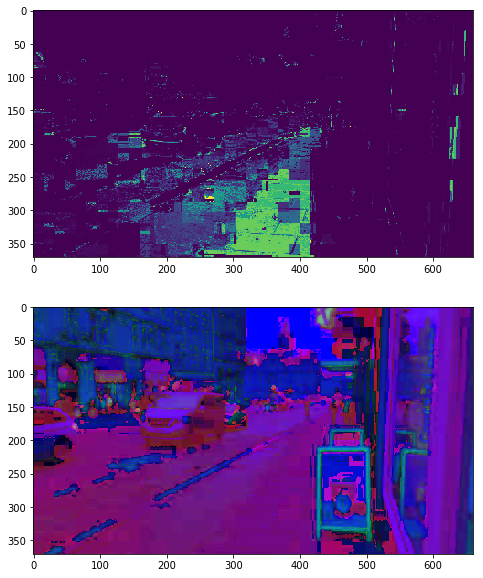

In [17]:
h, s, v = cv2.split(search)
B = R[h.ravel(), s.ravel()]
B = np.minimum(B, 1)
B = B.reshape(search.shape[:2])
f, ax = plt.subplots(2, 1, figsize = (10, 10))
ax[0].imshow(B)
ax[1].imshow(search)

c:\users\zheng\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
c:\users\zheng\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\zheng\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([169.,   2.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.05126496, 0.10252993, 0.1537949 , 0.20505986,
        0.25632483, 0.3075898 , 0.35885477, 0.4101197 , 0.46138468,
        0.51264966], dtype=float32),
 <a list of 10 Patch objects>)

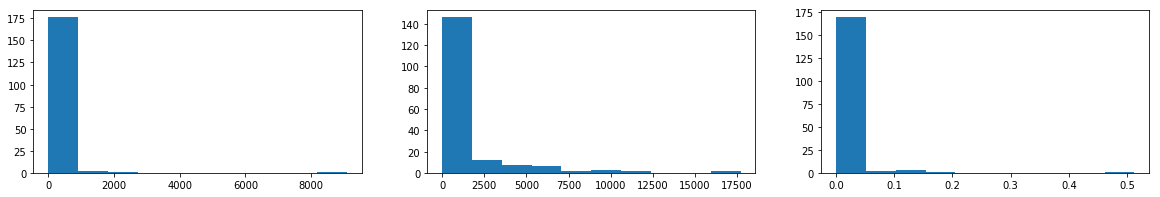

In [25]:
# 1-channel
M = cv2.calcHist([target], [0], None, [180], [0, 180])
I = cv2.calcHist([search], [0], None, [180], [0, 180])
R = M / I
f, ax = plt.subplots(1, 3, figsize = (20, 3))
ax[0].hist(M)
ax[1].hist(I)
ax[2].hist(R)

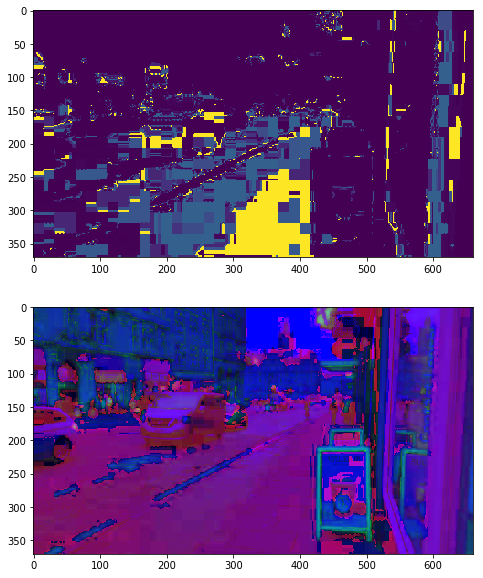

In [29]:
B = R[h.ravel()]
B = np.minimum(B, 1)
B = B.reshape(search.shape[:2])
f, ax = plt.subplots(2, 1, figsize = (10, 10))
ax[0].imshow(B)
ax[1].imshow(search)

## Note:  
Histogram backprojection finds the co-occuring `features` in the target image and the search image.  
The `features` can be the co-occurence of `H` channel values, or the co-occurence of 2-channel histogram values.  
Perhaps this idea can be extended with deep learning, where the `features` can be the low level features extracted by CNN.